https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# Utilities

In [4]:
##  preserntation for a confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [5]:
'''Trains a simple convnet on the MNIST dataset.
'''

from __future__ import print_function
import time
from datetime import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 100
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# Model K2

model = Sequential()

# Conv Layer 1
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# FC Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [7]:
# Training
start_time = datetime.now()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print("Time Elapsed: {} seconds".format((datetime.now() - start_time).total_seconds()))

# Testing
start_time = datetime.now()
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Time Elapsed: {} seconds".format((datetime.now() - start_time).total_seconds()))

Epoch 1/6
600/600 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.1137 - loss: 3.9567 - val_accuracy: 0.2388 - val_loss: 2.1350
Epoch 2/6
600/600 ━━━━━━━━━━━━━━━━━━━━ 64s 106ms/step - accuracy: 0.1989 - loss: 2.8375 - val_accuracy: 0.4548 - val_loss: 1.6385
Epoch 3/6
600/600 ━━━━━━━━━━━━━━━━━━━━ 64s 106ms/step - accuracy: 0.3006 - loss: 2.2234 - val_accuracy: 0.5876 - val_loss: 1.3295
Epoch 4/6
600/600 ━━━━━━━━━━━━━━━━━━━━ 65s 108ms/step - accuracy: 0.3985 - loss: 1.8274 - val_accuracy: 0.6760 - val_loss: 1.1249
Epoch 5/6
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.4753 - loss: 1.5656 - val_accuracy: 0.7386 - val_loss: 0.9757
Epoch 6/6
600/600 ━━━━━━━━━━━━━━━━━━━━ 106s 176ms/step - accuracy: 0.5402 - loss: 1.3740 - val_accuracy: 0.7800 - val_loss: 0.8613
Time Elapsed: 489.873046 seconds
Test loss: 0.8613125681877136
Test accuracy: 0.7799999713897705
Time Elapsed: 11.685044 seconds


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


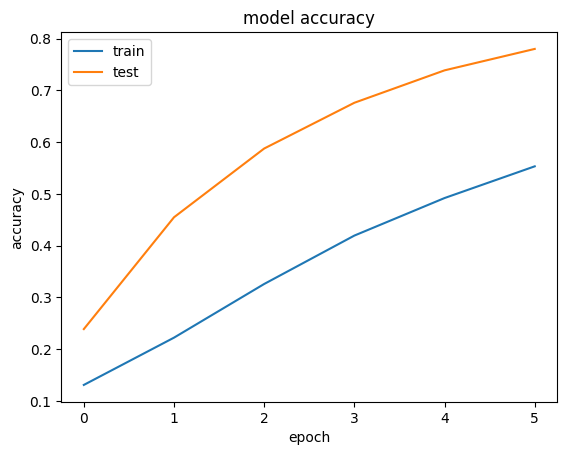

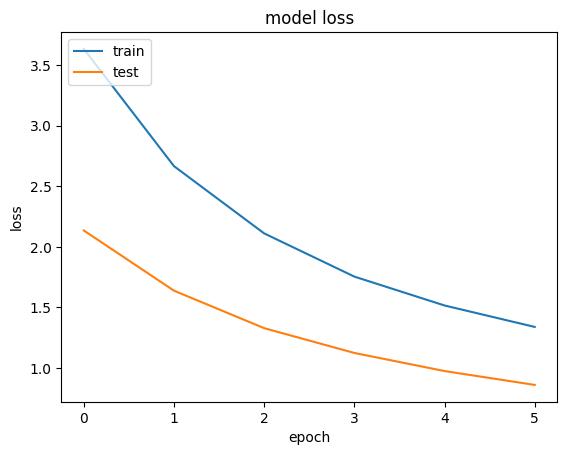

In [8]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [11]:
predictions = model.predict(x_test, verbose=0)


In [12]:


yitest = np.argmax(y_test, axis=1)

yptest = np.argmax(predictions, axis=1)
print (yitest)
print (yptest)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 8 6]


In [13]:
## For analysis show also the confusion matrix

cfm = confusion_matrix(yitest, yptest)
print (cfm)

[[ 859    2   21   10   11   15   43    1   16    2]
 [   0 1114    5    4    1    1    2    0    7    1]
 [  19    7  815   27   22    7   50   18   49   18]
 [  10    9  127  632    4   72   16   47   53   40]
 [   8   25    2   14  758   10   46   15   18   86]
 [  15   20   18  159   13  566   19   10   36   36]
 [  30   26    8   11   31   23  806    5   17    1]
 [   9   30   28    7   11    1    1  852   12   77]
 [  43   24   28   49   12   24   28   29  656   81]
 [  18   27   16   19   58    9   10   83   27  742]]


Confusion matrix, without normalization


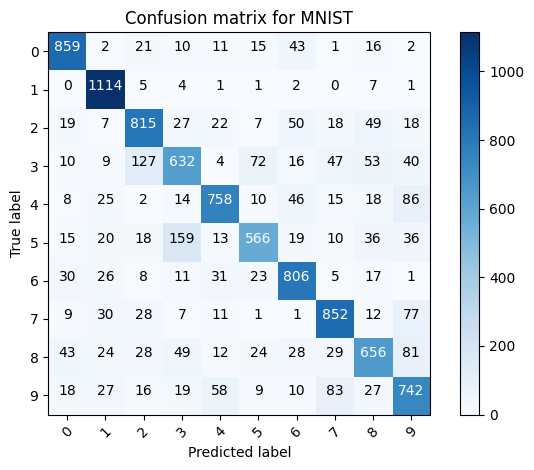

In [14]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')
